## E 17th Ave Closure

How has the closure of E 17th Ave at City Park impacted crash counts on parallel streets? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib._color_data import BASE_COLORS, TABLEAU_COLORS, CSS4_COLORS, XKCD_COLORS
from datetime import datetime
import pytz
from crash_data_analysis import CrashDataAnalysis

In [2]:
cda = CrashDataAnalysis()
df = cda.crash_dataframe(verbose=True)

Reading file: data/denver_crashes_2022_06_10__12_00.csv
Max timestamp: Thu Jun 9, 9:40 PM (0.62 days ago)
Fatality crashes this year: 36


In [3]:
longitude_downing = -104.97336507173875
longitude_york = -104.95978236506068
longitude_colorado = -104.94071722366886
longitude_glencoe = -104.92584705683117

streets_in_analysis = [
    'E 13TH AVE'
    , 'E 14TH AVE'
    , 'E COLFAX AVE'
    , 'E 16TH AVE'
    , 'E 17TH AVE'
    , 'E 23RD AVE'
    , 'E 26TH AVE'
]

In [4]:
df['analysis_street'] = None

for s in streets_in_analysis:
    rows = (
        (df.incident_address.str.contains(s))
        & (df.geo_lon > longitude_york)
        & (df.geo_lon < longitude_colorado)
        & (df.reported_date >= '2015-01-01')
    )
    
    df.loc[rows, 'analysis_street'] = s

In [5]:
# df[df.analysis_street.notnull()]

In [6]:
crash_counts = pd.pivot_table(
    data=df
#     , index=df.reported_date.dt.strftime('%Y-%m')
    , index=df.reported_date.dt.to_period('Q')
    , columns='analysis_street'
    , values='one'
    , aggfunc=sum
    , fill_value=0
)

/Users/devin/Projects/_environments/generic/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [7]:
crash_counts = crash_counts[streets_in_analysis].copy()
crash_counts

analysis_street,E 13TH AVE,E 14TH AVE,E COLFAX AVE,E 16TH AVE,E 17TH AVE,E 23RD AVE,E 26TH AVE
reported_date,,,,,,,
2015Q1,5,12,25,2,8,1,2
2015Q2,11,18,31,4,9,3,3
2015Q3,7,15,33,5,7,3,0
2015Q4,13,14,35,7,10,4,3
2016Q1,7,8,26,2,10,6,1
2016Q2,14,16,35,3,11,3,2
2016Q3,6,21,24,7,10,2,6
2016Q4,10,11,25,7,12,0,1
2017Q1,7,17,26,2,10,5,3


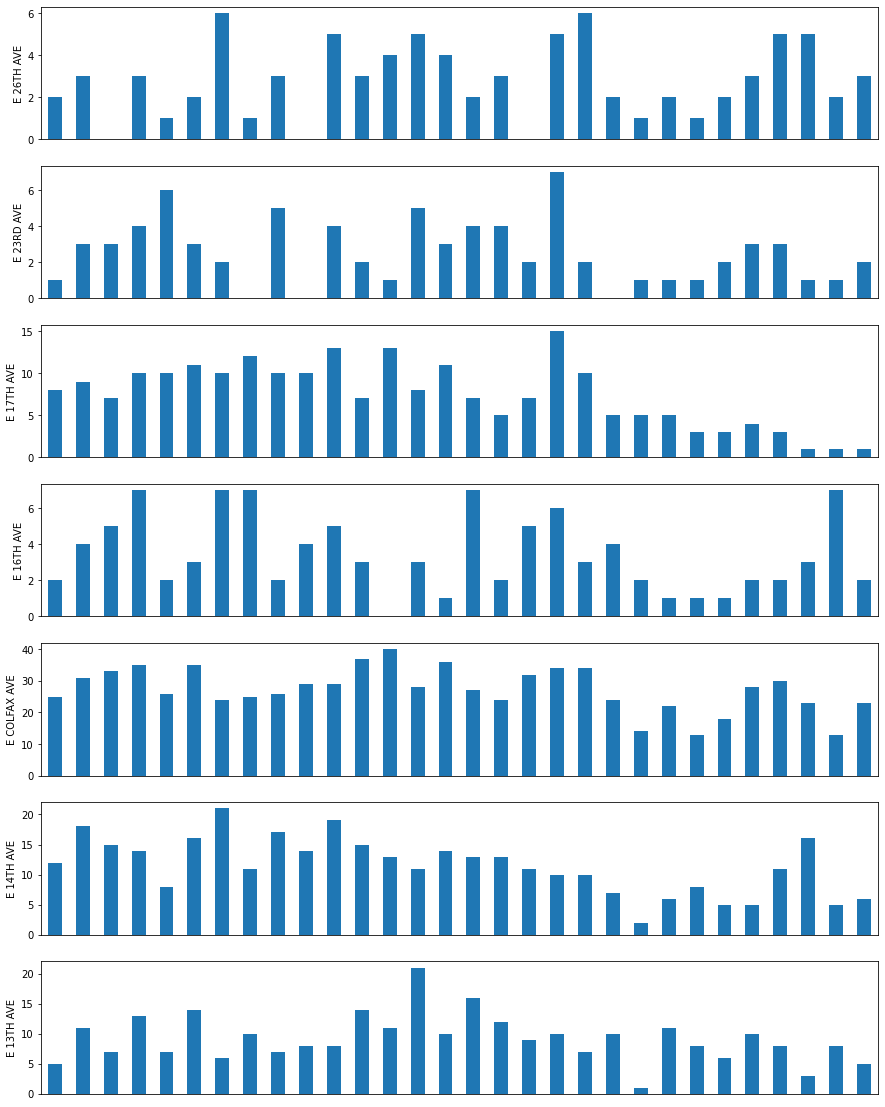

In [8]:
fig, ax = plt.subplots(nrows=len(streets_in_analysis), ncols=1, figsize=(15,20))

for idx, s in enumerate(streets_in_analysis[::-1]):
    crash_counts[s].plot.bar(ax=ax[idx])
    ax[idx].set_ylabel(s)
    ax[idx].set_xticks([])
    ax[idx].set_xlabel('')
    
# ax[6].set_xticks(['2015-01', '2016-01'])